# **Loading Libraries & Dataset**

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from textwrap import wrap, fill

In [3]:
# <--- UPLOAD THE TRAINING SET BEFORE RUNNING
df = pd.read_csv('Xy_train.csv')

In [4]:
# Dataset dimensions
df.shape

(9000, 22)

In [5]:
# Checking for duplicates
df.duplicated().sum()

0

In [6]:
# A brief view of some table entries, the 22 columns are transposed to provide a better look
df.head().T

,0,1,2,3,4
Gender,Female,Female,Male,Male,Male
Customer Type,Loyal Customer,Loyal Customer,disloyal Customer,disloyal Customer,Loyal Customer
Age,35.0,35.0,43.0,21.0,39.0
Type of Travel,Personal Travel,Business travel,Business travel,Business travel,Personal Travel
Class,Eco,Unknown,Eco,Eco,Eco
Flight Distance,731.0,354.0,719.0,772.0,618.0
Plane colors,2,2,3,1,1
Inflight wifi service,4.0,3.0,2.0,2.0,4.0
Departure/Arrival time convenient,3.0,3.0,2.0,2.0,2.0
Ease of Online booking,1.0,3.0,2.0,2.0,4.0


In [7]:
# Renaming a column with long name and unusual format
df.rename(columns={'Departure/Arrival time convenient': 'Timing convenient'}, inplace=True)

df.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Plane colors', 'Inflight wifi service',
       'Timing convenient', 'Ease of Online booking', 'Gate location',
       'Food and drink', 'Seat comfort', 'On-board service',
       'Leg room service', 'Baggage handling', 'Checkin service',
       'Inflight service', 'Cleanliness', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes', 'satisfaction'],
      dtype='object')

In [8]:
# A look on the number of unique values, in each column
df.nunique()

Gender                           2
Customer Type                    2
Age                             77
Type of Travel                   2
Class                            5
Flight Distance               2292
Plane colors                     3
Inflight wifi service            6
Timing convenient                6
Ease of Online booking           6
Gate location                    6
Food and drink                   6
Seat comfort                     5
On-board service                 5
Leg room service                 6
Baggage handling                 5
Checkin service                  5
Inflight service                 6
Cleanliness                      5
Departure Delay in Minutes     244
Arrival Delay in Minutes       241
satisfaction                     2
dtype: int64

In [9]:
# A closer look on each possible value
df.apply(lambda col: col.unique())

Gender                                                           [Female, Male]
Customer Type                          [Loyal Customer, disloyal Customer, nan]
Age                           [35.0, 43.0, 21.0, 39.0, 17.0, 51.0, 14.0, 66....
Type of Travel                          [Personal Travel, Business travel, nan]
Class                         [Eco, Unknown, Eco Plus, Business, nan, IT IS ...
Flight Distance               [731.0, 354.0, 719.0, 772.0, 618.0, 396.0, 909...
Plane colors                                                          [2, 3, 1]
Inflight wifi service                       [4.0, 3.0, 2.0, 1.0, 5.0, 0.0, nan]
Timing convenient                           [3.0, 2.0, 5.0, 1.0, 4.0, 0.0, nan]
Ease of Online booking                      [1.0, 3.0, 2.0, 4.0, 5.0, 0.0, nan]
Gate location                             [4.0, 3.0, 5.0, 2.0, 1.0, nan, 999.0]
Food and drink                              [3.0, 4.0, 2.0, 1.0, 5.0, 0.0, nan]
Seat comfort                            

In [10]:
# An overview of the dataset completeness, and the current data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Gender                      9000 non-null   object 
 1   Customer Type               8999 non-null   object 
 2   Age                         8999 non-null   float64
 3   Type of Travel              8999 non-null   object 
 4   Class                       8999 non-null   object 
 5   Flight Distance             8998 non-null   float64
 6   Plane colors                9000 non-null   int64  
 7   Inflight wifi service       8998 non-null   float64
 8   Timing convenient           8998 non-null   float64
 9   Ease of Online booking      8998 non-null   float64
 10  Gate location               8998 non-null   float64
 11  Food and drink              8998 non-null   float64
 12  Seat comfort                8999 non-null   float64
 13  On-board service            8999 

*   Columns 0, 1, 3, 4, 6 contain nominal scale data --> should be converted to data type "category".

*   Columns 7 - 18 contain discrete ordinal data (likert scores), but are "float64" data type --> should be converted to data type "Int64".

In [11]:
categorical_columns = df.columns[[0, 1, 3, 4, 6]]
df[categorical_columns] = df[categorical_columns].astype('category')

likert_columns = df.columns[list(range(7, 19))]
df[likert_columns] = df[likert_columns].astype('Int64')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   Gender                      9000 non-null   category
 1   Customer Type               8999 non-null   category
 2   Age                         8999 non-null   float64 
 3   Type of Travel              8999 non-null   category
 4   Class                       8999 non-null   category
 5   Flight Distance             8998 non-null   float64 
 6   Plane colors                9000 non-null   category
 7   Inflight wifi service       8998 non-null   Int64   
 8   Timing convenient           8998 non-null   Int64   
 9   Ease of Online booking      8998 non-null   Int64   
 10  Gate location               8998 non-null   Int64   
 11  Food and drink              8998 non-null   Int64   
 12  Seat comfort                8999 non-null   Int64   
 13  On-board service  

Data type casting was successful.

# **Data Visualization - Univariate & With respect to target**

In [13]:
sns.set_theme()
sns.set(font_scale=1)

**4 Continous Variables** - Histograms

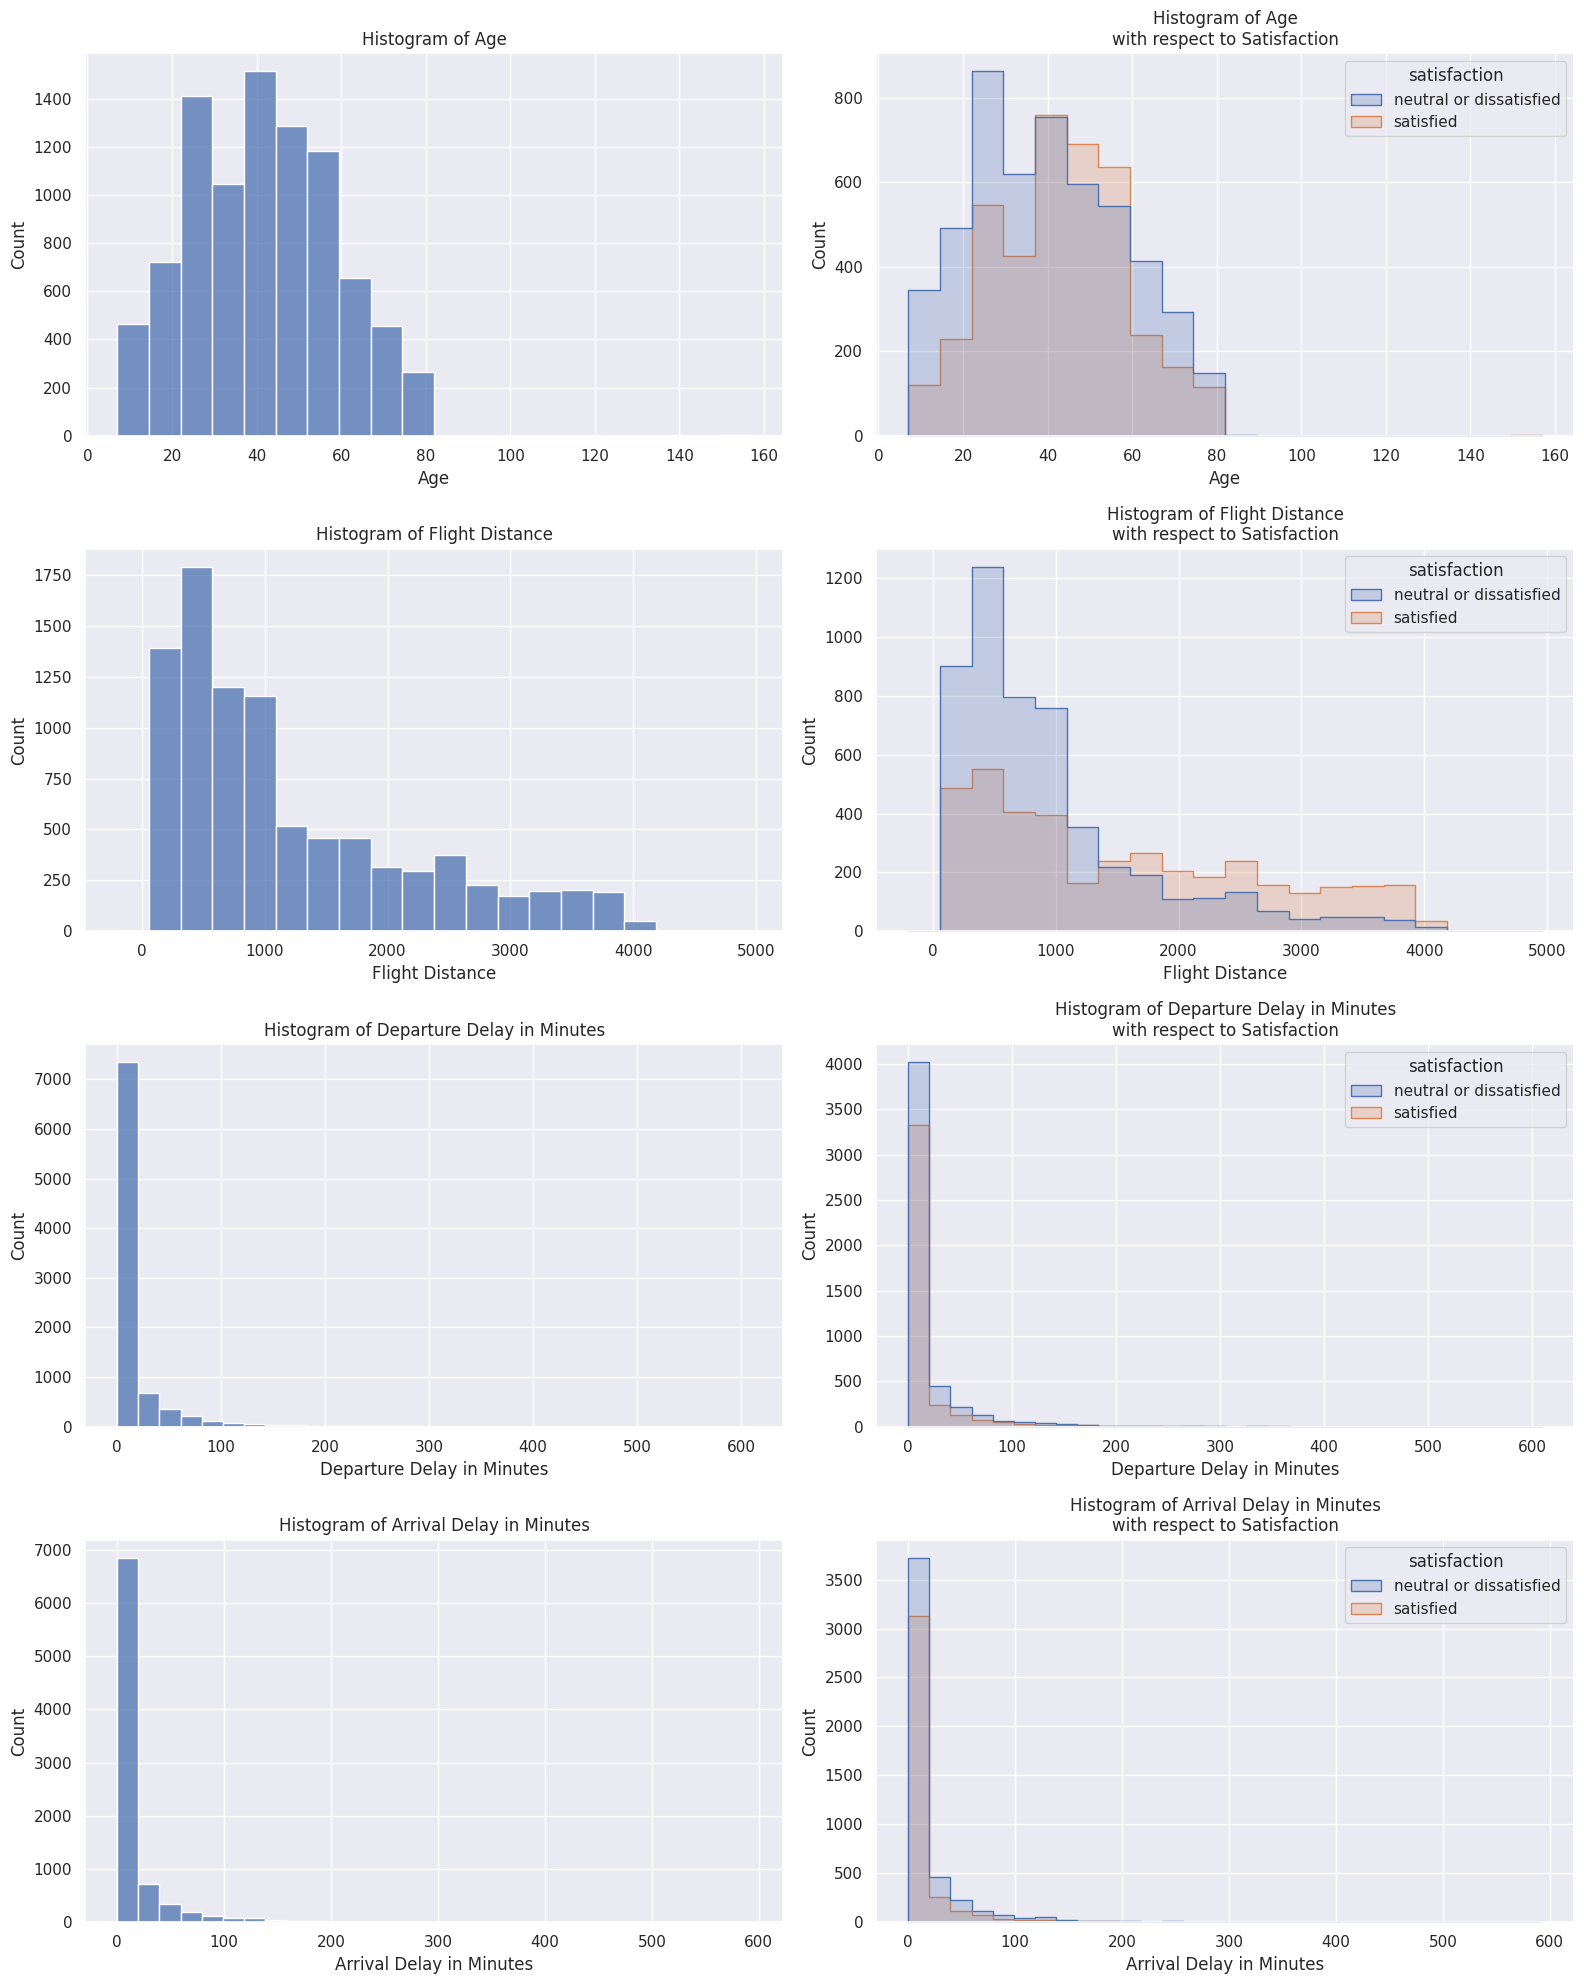

In [14]:
continous_vars = df.select_dtypes(include=["float64"]).columns

bins = [20, 20, 30, 30]
log_scales = [False, False, False, False]

fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(16, 20))
# fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(14, 16))

for i, col in enumerate(continous_vars):
  sns.histplot(data=df, x=col, bins=bins[i], log_scale=log_scales[i], ax=axs[i, 0]).set_title(f"Histogram of {col}")
  sns.histplot(data=df, x=col, bins=bins[i], log_scale=log_scales[i], ax=axs[i, 1], hue="satisfaction", element="step").set_title(f"Histogram of {col}\nwith respect to Satisfaction")
  # sns.boxplot(data=df, y=col, hue="satisfaction", ax=axs[i, 2], showfliers=True)

plt.tight_layout()
plt.savefig("Visualization_Continous.png")
plt.show()

**12 Discrete Variables** - Bar charts

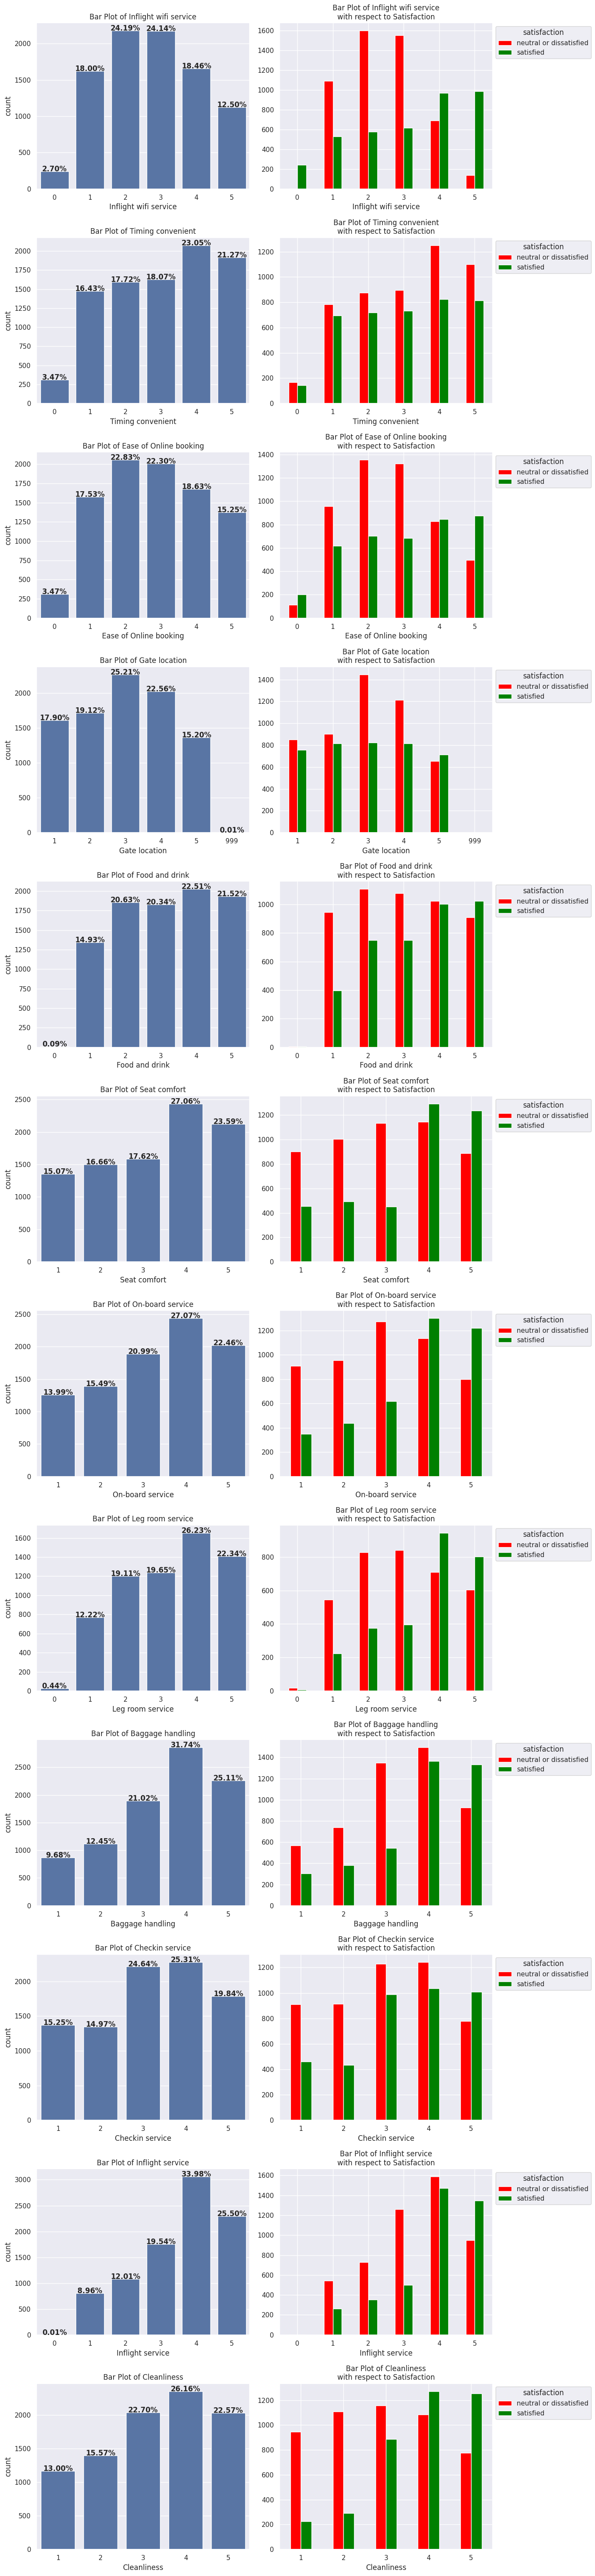

In [15]:
# A function to display the exact A-priori probability for each value
def add_percentages(ax, counts):
  for bar_index, (index, bar_height) in enumerate(counts.items()):
    ax.text(x=bar_index,
            y=bar_height,
            s=f'{((bar_height / sum(counts.values)) * 100):.2f}%',
            ha='center',
            fontweight='bold')

discrete_vars = df.select_dtypes(include=["Int64"]).columns

fig, axs = plt.subplots(nrows=12, ncols=2, figsize=(14, 60))
# set satisfied as green, unsatisfied as red
for i, col in enumerate(discrete_vars):
  counts = df[col].value_counts().sort_index()
  counts_respect = df.groupby([col, 'satisfaction']).size().unstack(fill_value=0)

  sns.barplot(counts, ax=axs[i, 0]).set_title(f"Bar Plot of {col}")
  add_percentages(axs[i, 0], counts)

  counts_respect.plot(kind='bar', color=['red', 'green'], ax=axs[i, 1]).set_title(f"Bar Plot of {col}\nwith respect to Satisfaction")
  axs[i, 1].tick_params(axis='x', labelrotation=0)
  sns.move_legend(axs[i, 1], "upper left", bbox_to_anchor=(1, 1))


plt.tight_layout()
plt.savefig("Visualization_Discrete.png")
plt.show()

**6 Categorical Variables** - Pie & Count plots

<ipython-input-16-b33c0448448d>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i, 1].set_xticklabels(labels)
<ipython-input-16-b33c0448448d>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i, 1].set_xticklabels(labels)
<ipython-input-16-b33c0448448d>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i, 1].set_xticklabels(labels)
<ipython-input-16-b33c0448448d>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i, 1].set_xticklabels(labels)
<ipython-input-16-b33c0448448d>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i, 1].set_xticklabels(labels)
<ipython-input-16-b33c0448448d>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i, 1].set_xticklabels(labels)


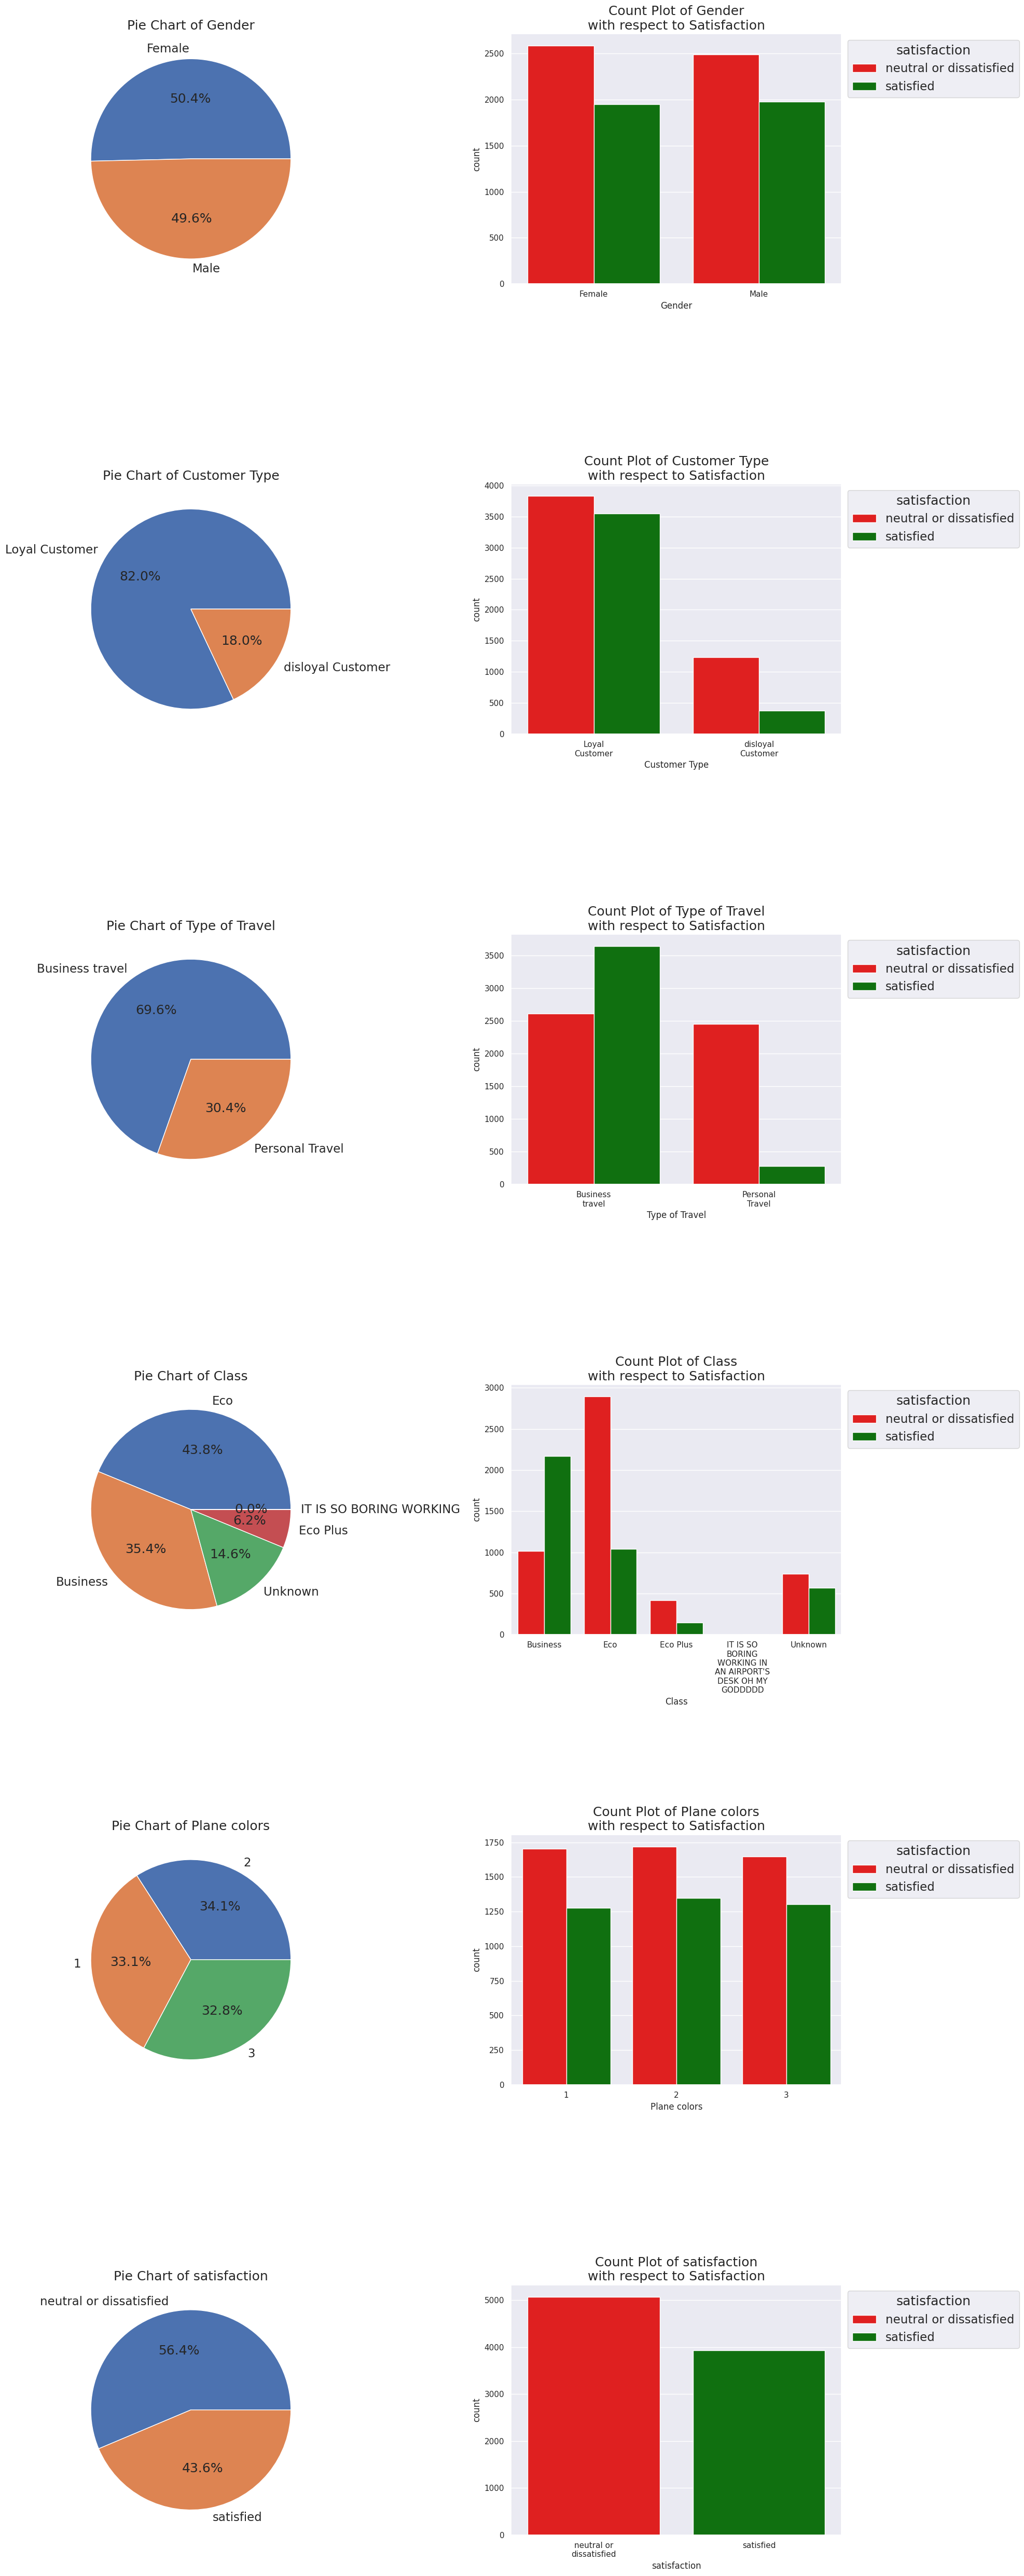

In [16]:
categorical_vars = df.select_dtypes(include=["object", "category"]).columns

fig, axs = plt.subplots(nrows=6, ncols=2, figsize = (20, 50))
sns.set(font_scale=1.5)

for i, col in enumerate(categorical_vars):
  counts = df[col].value_counts()
  try:
    labels = [l[:23] for l in counts.index]
  except:
    labels = counts.index

  axs[i, 0].pie(counts.values, labels=labels, autopct="%1.1f%%")
  axs[i, 0].set_title(f'Pie Chart of {col}')

  countplt = sns.countplot(df, x=col, hue='satisfaction', palette=['red', 'green'], ax=axs[i, 1])
  labels = [fill(label.get_text(), 12) for label in countplt.get_xticklabels()]
  axs[i, 1].set_xticklabels(labels)
  countplt.set_title(f'Count Plot of {col}\nwith respect to Satisfaction')

  try:
    sns.move_legend(axs[i, 1], "upper left", bbox_to_anchor=(1, 1))
  except:
    pass

plt.tight_layout()
fig.subplots_adjust(hspace=0.8)
plt.savefig("Visualization_Categorical.png")
plt.show()

# **Data Visualization - Bivariate Analysis**

We'll visualize first the correlations, between numeric variables

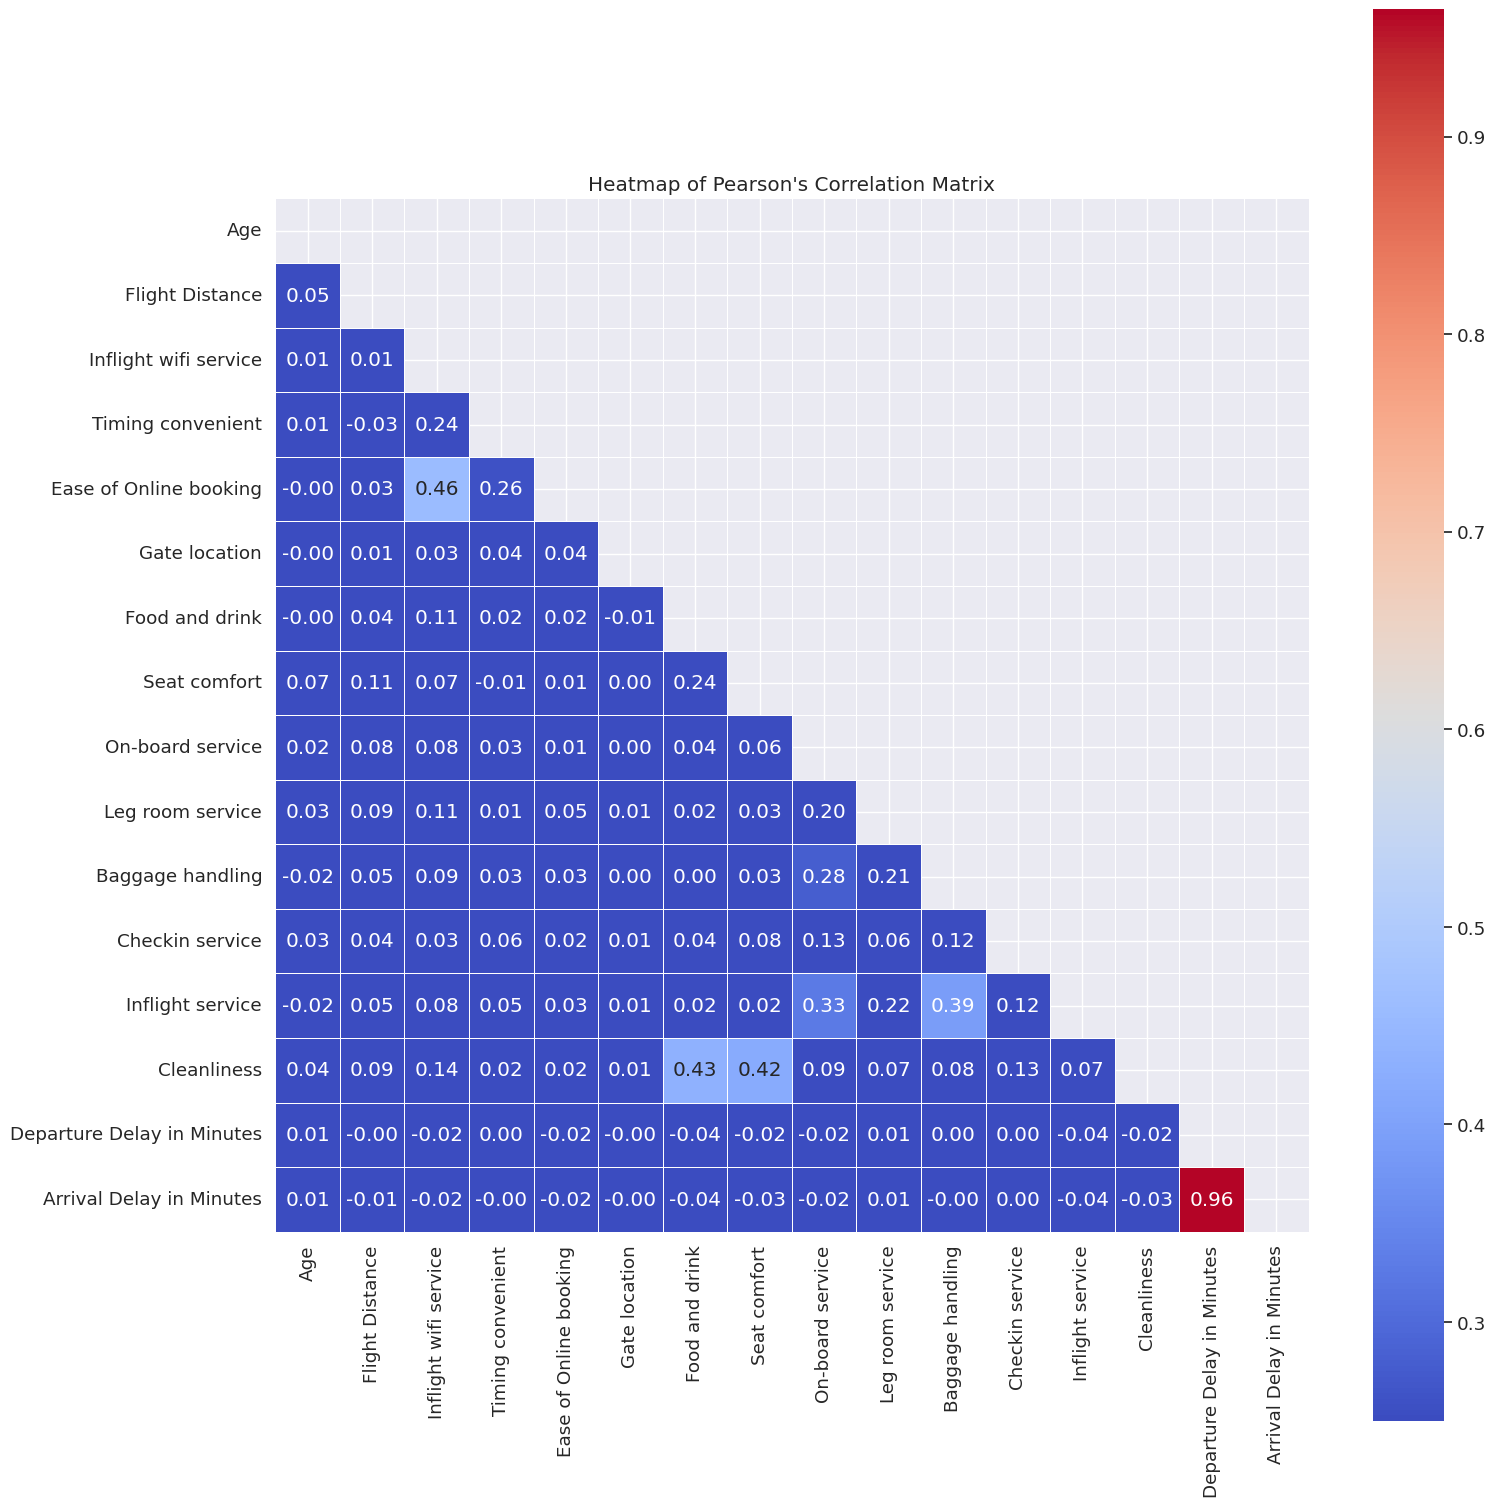

In [17]:
sns.set(font_scale=1.2)

corr_matrix = df.corr(numeric_only=True)
threshold = 0.25

# Filtering out the diagonal and duplicates
mask = np.triu(np.ones_like(corr_matrix))

plt.figure(figsize=(16, 16))
ax = sns.heatmap(corr_matrix, square=True, annot=True, fmt=".2f", cmap="coolwarm", mask=mask, linewidth=.5, vmin=threshold)
plt.title("Heatmap of Pearson's Correlation Matrix")

plt.tight_layout()
plt.savefig("Correlation_Pearson.png")
plt.show()

5 Interesting bits:

*   Very high 0.96 pearson correlation between Departure and Arrival delays. Expected, since pilots usually won't increase speed to compensate for delays.

*   Medium-high 0.46 pearson correlation between Ease of online booking and Inflight wifi service. Slightly unexpected, Online booking is easy to implement while it's hard and cost more to maintain constantly good inflight wifi.

*   Medium 0.43 pearson correlation between Food and Cleanliness. Expected, distinct services but both related to service standards and supplies.

*   Medium 0.39 pearson correlation between Baggage handling and Inflight service. Unexpected, because baggage handling usually associated with ground operations, whereas inflight service is related to the experience during the flight. services provided by 2 entirely different teams.

*   Non-existent -0.01 pearson correlation between Flight Distance and Arrival Delay. Very unexpected, longer flights are associated with higher variability and potential delays due to factors like weather, air traffic control, technical issues and more.

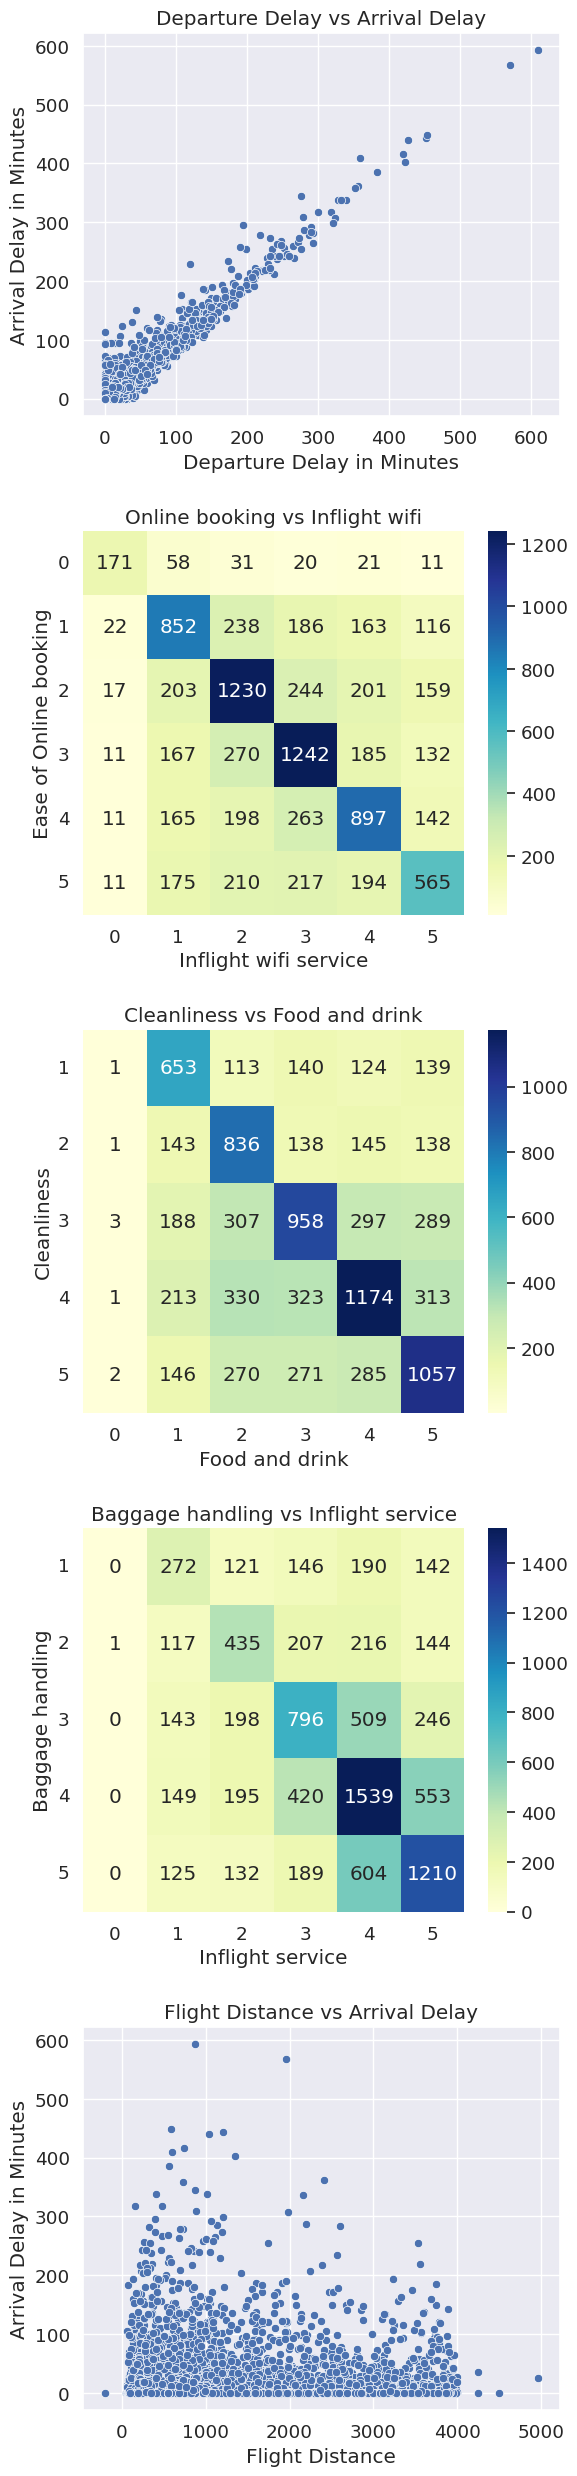

In [18]:
fig, axs = plt.subplots(nrows = 5, figsize = (6, 25))

sns.scatterplot(data=df, x='Departure Delay in Minutes', y='Arrival Delay in Minutes', ax=axs[0])
axs[0].set_title('Departure Delay vs Arrival Delay')

online_vs_wifi = pd.crosstab(df['Ease of Online booking'], df['Inflight wifi service'])
sns.heatmap(online_vs_wifi, annot=True, fmt='d', cmap='YlGnBu', ax=axs[1])
axs[1].tick_params(axis='y', labelrotation=0)
axs[1].set_title('Online booking vs Inflight wifi')

cleanliness_vs_food = pd.crosstab(df['Cleanliness'], df['Food and drink'])
sns.heatmap(cleanliness_vs_food, annot=True, fmt='d', cmap='YlGnBu', ax=axs[2])
axs[2].tick_params(axis='y', labelrotation=0)
axs[2].set_title('Cleanliness vs Food and drink')

baggage_vs_inflight = pd.crosstab(df['Baggage handling'], df['Inflight service'])
sns.heatmap(baggage_vs_inflight, annot=True, fmt='d', cmap='YlGnBu', ax=axs[3])
axs[3].tick_params(axis='y', labelrotation=0)
axs[3].set_title('Baggage handling vs Inflight service')

sns.scatterplot(data=df, x='Flight Distance', y='Arrival Delay in Minutes', ax=axs[4])
axs[4].set_title('Flight Distance vs Arrival Delay')


plt.tight_layout()
fig.subplots_adjust(hspace=0.3)
plt.savefig("Pearson_Correlated_Variables.png")

Another look on 'Leg room service', 'Inflight service' and 'Seat comfort' with respect to target variable 'satisfaction'. This time in a stacked column bar.

In [19]:
def add_labels(ax, counts, total_counts, fontweight='bold'):
    for i in range(len(counts)):
        total = total_counts.iloc[i]
        for j, count in enumerate(counts.iloc[i]):
            height = count / 2 + counts.iloc[i][:j].sum()
            percentage_within_group = (count / total) * 100
            percentage_of_total = (total / total_counts.sum()) * 100
            ax.text(i, height, f"{count}\n({percentage_within_group:.2f}%)",
                    ha='center', color='white', fontweight=fontweight, fontsize=12)
        # Add total percentage on top of each stack
        ax.text(i, total + 1, f"{percentage_of_total:.2f}% of total",
                ha='center', color='black', fontweight=fontweight, fontsize=12)

def wrap_labels(labels, width=15):
    return [fill(str(label), width) for label in labels]

def plot_bar_with_respect(df, category, target, xlabel, title):
    fig, ax = plt.subplots(figsize=(10, 12))
    counts = df.groupby([category, target]).size().unstack(fill_value=0)
    total_counts = df.groupby(category).size()

    # Plot the stacked bar plot using the specified colors
    colors = ['red', 'green']
    counts.plot(kind='bar', stacked=True, color=colors[:2], ax=ax, width=0.8)

    wrapped_values = wrap_labels(counts.index, width=15)
    ax.set_xticklabels(wrapped_values, rotation=0)

    add_labels(ax, counts, total_counts)

    plt.xlabel(xlabel)
    plt.ylabel('Frequency')
    plt.title(title)
    # Position legend outside the plot area
    # ax.legend(title=target, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.savefig(f'{title}.png', bbox_inches='tight')
    # plt.show()
    plt.close()

vars = ['Inflight service', 'Leg room service', 'Seat comfort']
for var in vars:
  plot_bar_with_respect(df=df, category=var, target='satisfaction', xlabel=var, title=f'{var} with respect to satisfaction')

# **Data Cleaning (1) - Preperation and record deletion**

In [20]:
# Count Nulls per column
null_counts = df.isnull().sum(axis = 0)
null_counts_df = null_counts.to_frame(name='Null Count')

print(null_counts_df)
print(f"\nDataFrame's shape, BEFORE rows drop: \n{df.shape}")

                            Null Count
Gender                               0
Customer Type                        1
Age                                  1
Type of Travel                       1
Class                                1
Flight Distance                      2
Plane colors                         0
Inflight wifi service                2
Timing convenient                    2
Ease of Online booking               2
Gate location                        2
Food and drink                       2
Seat comfort                         1
On-board service                     1
Leg room service                  2701
Baggage handling                     1
Checkin service                      1
Inflight service                     1
Cleanliness                          1
Departure Delay in Minutes           1
Arrival Delay in Minutes           471
satisfaction                         1

DataFrame's shape, BEFORE rows drop: 
(9000, 22)


In [21]:
for i in range(23):
  print(f'Rows with {i} Nulls: {len(df.loc[df.isnull().sum(1) == i])}')

Rows with 0 Nulls: 5970
Rows with 1 Nulls: 2886
Rows with 2 Nulls: 142
Rows with 3 Nulls: 0
Rows with 4 Nulls: 0
Rows with 5 Nulls: 0
Rows with 6 Nulls: 0
Rows with 7 Nulls: 0
Rows with 8 Nulls: 0
Rows with 9 Nulls: 0
Rows with 10 Nulls: 1
Rows with 11 Nulls: 0
Rows with 12 Nulls: 0
Rows with 13 Nulls: 0
Rows with 14 Nulls: 0
Rows with 15 Nulls: 0
Rows with 16 Nulls: 1
Rows with 17 Nulls: 0
Rows with 18 Nulls: 0
Rows with 19 Nulls: 0
Rows with 20 Nulls: 0
Rows with 21 Nulls: 0
Rows with 22 Nulls: 0


There are 2 records with way too many Nulls (10 or 16), we'll take care of them first, by deleting them. Once it's done, we'll have a manageable amount of 8998 training records remaining, all of them with up to 2 Nulls.

In [22]:
# Drop records with 25%+ Nulls
df.dropna(thresh=0.75 * len(df.columns), inplace=True)

for i in range(23):
  print(f'Rows with {i} Nulls: {len(df.loc[df.isnull().sum(1) == i])}')

Rows with 0 Nulls: 5970
Rows with 1 Nulls: 2886
Rows with 2 Nulls: 142
Rows with 3 Nulls: 0
Rows with 4 Nulls: 0
Rows with 5 Nulls: 0
Rows with 6 Nulls: 0
Rows with 7 Nulls: 0
Rows with 8 Nulls: 0
Rows with 9 Nulls: 0
Rows with 10 Nulls: 0
Rows with 11 Nulls: 0
Rows with 12 Nulls: 0
Rows with 13 Nulls: 0
Rows with 14 Nulls: 0
Rows with 15 Nulls: 0
Rows with 16 Nulls: 0
Rows with 17 Nulls: 0
Rows with 18 Nulls: 0
Rows with 19 Nulls: 0
Rows with 20 Nulls: 0
Rows with 21 Nulls: 0
Rows with 22 Nulls: 0


In [23]:
# Count Nulls per column
null_counts = df.isnull().sum(axis = 0)
null_counts_df = null_counts.to_frame(name='Null Count')

print(null_counts_df)
print("\nDataset's shape after dropping serious 'Nulls-Infested' rows:\n", df.shape)

                            Null Count
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Plane colors                         0
Inflight wifi service                0
Timing convenient                    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Seat comfort                         0
On-board service                     0
Leg room service                  2700
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes           470
satisfaction                         0

Dataset's shape after dropping serious 'Nulls-Infested' rows:
 (8998, 22)


It seems the 18 columns that had 1-2 Nulls a moment ago were all concentrated in the 2 Null-Infested rows we deleted. Now there are just 2 more columns with Null values remaining:

*   Leg room service - A significant amount of Null values (2700, or 30%), We'll choose to fill them using a random sample (with returns) of size 2700 from the existing 6298 values. This way of filling ensures the column's distribution remains approximately the same.

*   Arrival Delay in Minutes - Because there's significant correlation with Departure Delay in Minutes and a very strong linear relationship, as evident by the scatter plot between the two and the 0.96 Pearson coefficient, we'll choose to fill the values using Linear Regression between them.



# **Data Cleaning (2) - Deleting Columns**

For now, we'll choose to drop only 1 column. The most useless column appeared to be "Plane colors".

In [24]:
df.drop(columns=['Plane colors'], inplace=True)
df.shape

(8998, 21)

# **Data Cleaning (3) - Filling 'Leg room service' column**

In [25]:
old_column = df['Leg room service'].copy() # old column, reserved seperately for visualizing the change

# Filling 'Leg room service' Nulls with a random sample (with returns) from the existing values
isnull = df['Leg room service'].isnull()
sample = df['Leg room service'].dropna().sample(isnull.sum(), replace=True).values
df.loc[isnull, 'Leg room service'] = sample

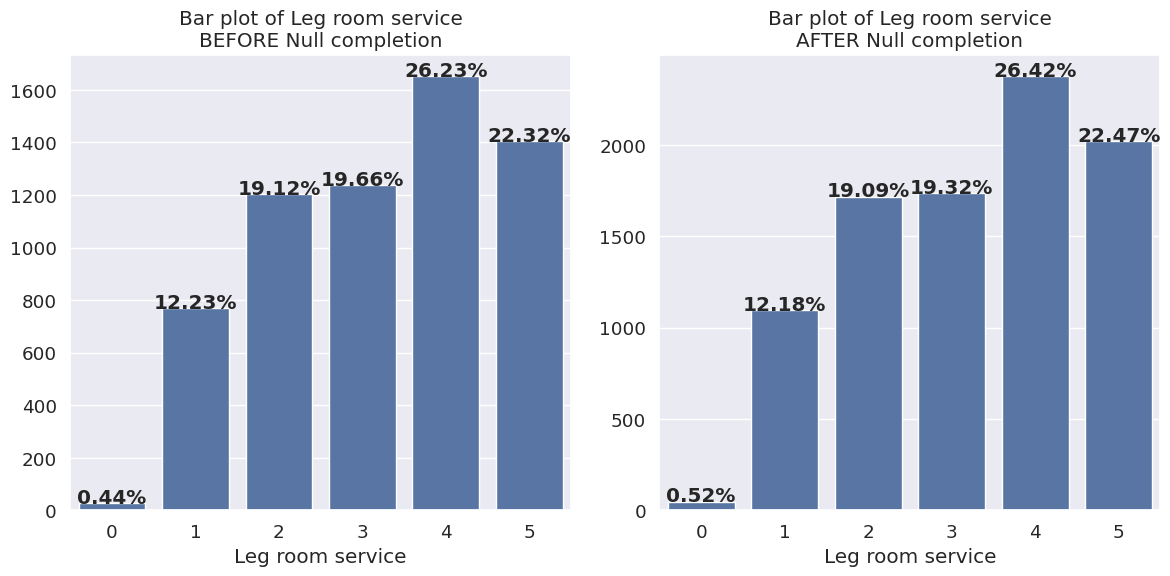

In [27]:
# Plotting the discrete distribution of 'Leg room service' which is now complete without Nulls
def add_percentages(ax, counts):
    total = sum(counts.values)
    for bar_index, (index, bar_height) in enumerate(counts.items()):
        ax.text(x=bar_index,
                y=bar_height,
                s=f'{((bar_height / total) * 100):.2f}%',
                ha='center',
                fontweight='bold')

fig, axs = plt.subplots(ncols=2, figsize=(12, 6))

counts_old = old_column.value_counts().sort_index()
counts_new = df['Leg room service'].value_counts().sort_index()

sns.barplot(x=counts_old.index, y=counts_old.values, ax=axs[0]).set_title(f"Bar plot of Leg room service\nBEFORE Null completion")
sns.barplot(x=counts_new.index, y=counts_new.values, ax=axs[1]).set_title(f"Bar plot of Leg room service\nAFTER Null completion")
add_percentages(axs[0], counts_old)
add_percentages(axs[1], counts_new)

plt.tight_layout()
plt.show()

It's evident the distribution has barely changed

In [28]:
print(df.isnull().sum(axis = 0))

Gender                          0
Customer Type                   0
Age                             0
Type of Travel                  0
Class                           0
Flight Distance                 0
Inflight wifi service           0
Timing convenient               0
Ease of Online booking          0
Gate location                   0
Food and drink                  0
Seat comfort                    0
On-board service                0
Leg room service                0
Baggage handling                0
Checkin service                 0
Inflight service                0
Cleanliness                     0
Departure Delay in Minutes      0
Arrival Delay in Minutes      470
satisfaction                    0
dtype: int64


# **Data Cleaning (4) - Filling 'Arrival Delay in Minutes' column**

In [29]:
old_corr = df[['Departure Delay in Minutes', 'Arrival Delay in Minutes']].corr().iloc[1, 0]
print(f'Pearson correlation between Departure and Arrival delays is currently {old_corr:.4f}')

Pearson correlation between Departure and Arrival delays is currently 0.9644


In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer(estimator=LinearRegression())

In [31]:
df.loc[:, ['Departure Delay in Minutes', 'Arrival Delay in Minutes']] = imputer.fit_transform(df.loc[:, ['Departure Delay in Minutes', 'Arrival Delay in Minutes']])

In [32]:
new_corr = df[['Departure Delay in Minutes', 'Arrival Delay in Minutes']].corr().iloc[1, 0]

print(f'Pearson correlation increased from {old_corr:.4f} to {new_corr:.4f}')

Pearson correlation increased from 0.9644 to 0.9654


In [33]:
df.isnull().sum(axis = 0)

Gender                        0
Customer Type                 0
Age                           0
Type of Travel                0
Class                         0
Flight Distance               0
Inflight wifi service         0
Timing convenient             0
Ease of Online booking        0
Gate location                 0
Food and drink                0
Seat comfort                  0
On-board service              0
Leg room service              0
Baggage handling              0
Checkin service               0
Inflight service              0
Cleanliness                   0
Departure Delay in Minutes    0
Arrival Delay in Minutes      0
satisfaction                  0
dtype: int64

# **Data Cleaning (5) - Replacing invalid values**

In [34]:
# A close look again on each possible value
df.apply(lambda col: col.unique())

Gender                        ['Female', 'Male']
Categories (2, object): ['F...
Customer Type                 ['Loyal Customer', 'disloyal Customer']
Catego...
Age                           [35.0, 43.0, 21.0, 39.0, 17.0, 51.0, 14.0, 66....
Type of Travel                ['Personal Travel', 'Business travel']
Categor...
Class                         ['Eco', 'Unknown', 'Eco Plus', 'Business', 'IT...
Flight Distance               [731.0, 354.0, 719.0, 772.0, 618.0, 396.0, 909...
Inflight wifi service                                        [4, 3, 2, 1, 5, 0]
Timing convenient                                            [3, 2, 5, 1, 4, 0]
Ease of Online booking                                       [1, 3, 2, 4, 5, 0]
Gate location                                              [4, 3, 5, 2, 1, 999]
Food and drink                                               [3, 4, 2, 1, 5, 0]
Seat comfort                                                    [3, 2, 5, 1, 4]
On-board service                        

The discrete/categorical invalid values were spotted easily here and in the visualizations:
*   Gate location: 999
*   Class: unexpected 5th value - "IT IS SO BORING WORKING IN AN AIRPORT'S DESK OH MY GODDDDD"

Continous values will be searched using conditions.



In [35]:
invalid_conditions = {
    'Gate location': df['Gate location'] == 999,
    'Class': df['Class'] == "IT IS SO BORING WORKING IN AN AIRPORT'S DESK OH MY GODDDDD",

    'Age': (df['Age'] > 120) | (df['Age'] <= 0),
    'Flight Distance': (df['Flight Distance'] < 0) | (df['Flight Distance'] > 25000),
    'Departure Delay in Minutes': df['Departure Delay in Minutes'] < 0,
    'Arrival Delay in Minutes': df['Arrival Delay in Minutes'] < 0
}

for col, condition in invalid_conditions.items():
  invalid_indexes = df[condition].index
  print(col)
  for idx in invalid_indexes:
    print(f"Index: {idx}, Value: {df.at[idx, col]}")
  print()

Gate location
Index: 7583, Value: 999

Class
Index: 8732, Value: IT IS SO BORING WORKING IN AN AIRPORT'S DESK OH MY GODDDDD

Age
Index: 7034, Value: 157.0
Index: 7035, Value: 156.0

Flight Distance
Index: 4859, Value: -204.0

Departure Delay in Minutes

Arrival Delay in Minutes



There are 5 invalid cell values in total. Let's Null them all, and then fill them.

*   **Gate location** & **Class** (categorical/discrete columns): fill with column's **Mode**

*   **Age** & **Flight Distance** (continous columns): fill them with column's **Median**





In [36]:
print('Nulls in dataset before Nulling: ', df.isnull().sum(axis = 0).sum())

# Replace invalid values with NaN
for column, condition in invalid_conditions.items():
    df.loc[condition, column] = np.nan

print('Nulls in dataset after Nulling: ', df.isnull().sum(axis = 0).sum())

for column in invalid_conditions.keys():
  if (df[column].dtype == 'category') | (df[column].dtype == 'Int64'):
        mode_value = df[column].mode().iloc[0]
        df[column].fillna(mode_value, inplace=True)
  else:
        median_value = df[column].median()
        df[column].fillna(median_value, inplace=True)

print('Nulls in dataset after Filling: ', df.isnull().sum(axis = 0).sum())

Nulls in dataset before Nulling:  0
Nulls in dataset after Nulling:  5
Nulls in dataset after Filling:  0


# **Data Cleaning (6) - Discretization**

In [38]:
age_bins = [0, 18, 40, 60, np.inf]
age_labels = ['0-18', '19-40', '41-60', '61+']

distance_bins = [0, 500, 1500, 2500, np.inf]
distance_labels = ['0-500', '500-1500', '1500-2500', '2500+']

delay_bins = [-np.inf, 0, 15, 30, 60, np.inf]
delay_labels = ['0', '1-15', '16-30', '31-60', '61+']

df['Age_Binned'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, include_lowest=True)
df['Flight_Distance_Binned'] = pd.cut(df['Flight Distance'], bins=distance_bins, labels=distance_labels, include_lowest=True)
df['Departure_Delay_in_Minutes_Binned'] = pd.cut(df['Departure Delay in Minutes'], bins=delay_bins, labels=delay_labels, include_lowest=True)
df['Arrival_Delay_in_Minutes_Binned'] = pd.cut(df['Arrival Delay in Minutes'], bins=delay_bins, labels=delay_labels, include_lowest=True)

In [42]:
df.sample(10).iloc[:, [2, 5, 18, 19, 21, 22, 23, 24]].T

,1118,495,7258,8911,4508,3603,4071,3203,5815,1718
Age,21.0,23.0,59.0,16.0,24.0,31.0,50.0,69.0,36.0,31.0
Flight Distance,859.0,247.0,849.0,719.0,733.0,541.0,965.0,240.0,462.0,151.0
Departure Delay in Minutes,0.0,0.0,6.0,34.0,0.0,0.0,0.0,0.0,0.0,129.0
Arrival Delay in Minutes,5.0,0.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,152.0
Age_Binned,19-40,19-40,41-60,0-18,19-40,19-40,41-60,61+,19-40,19-40
Flight_Distance_Binned,500-1500,0-500,500-1500,500-1500,500-1500,500-1500,500-1500,0-500,0-500,0-500
Departure_Delay_in_Minutes_Binned,0,0,1-15,31-60,0,0,0,0,0,61+
Arrival_Delay_in_Minutes_Binned,1-15,0,0,16-30,0,0,0,0,0,61+


# **Data Cleaning (7) - New Features**

We'll add 2 derived features:

*   Overall Service Rating - Summarizes scores related to satisfaction from the company's employees
*   Convenience Rating - Summarizes scores related to satisfaction from the airplane

In [43]:
df['Overall Service Rating'] = df['On-board service'] + df['Inflight service'] + df['Baggage handling'] + df['Checkin service']
df['Convenience Rating'] = df['Inflight wifi service'] + df['Food and drink'] + df['Seat comfort'] + df['Leg room service']

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8998 entries, 0 to 8999
Data columns (total 27 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   Gender                             8998 non-null   category
 1   Customer Type                      8998 non-null   category
 2   Age                                8998 non-null   float64 
 3   Type of Travel                     8998 non-null   category
 4   Class                              8998 non-null   category
 5   Flight Distance                    8998 non-null   float64 
 6   Inflight wifi service              8998 non-null   Int64   
 7   Timing convenient                  8998 non-null   Int64   
 8   Ease of Online booking             8998 non-null   Int64   
 9   Gate location                      8998 non-null   Int64   
 10  Food and drink                     8998 non-null   Int64   
 11  Seat comfort                       8998 non-null

In [44]:
df.sample(5).T

,5496,1874,8756,5703,7366
Gender,Male,Female,Male,Female,Male
Customer Type,Loyal Customer,Loyal Customer,Loyal Customer,Loyal Customer,Loyal Customer
Age,55.0,41.0,58.0,51.0,75.0
Type of Travel,Personal Travel,Business travel,Business travel,Business travel,Personal Travel
Class,Eco,Business,Eco,Business,Business
Flight Distance,733.0,321.0,733.0,280.0,447.0
Inflight wifi service,3,3,3,2,2
Timing convenient,3,3,3,2,2
Ease of Online booking,3,3,3,2,4
Gate location,3,3,3,2,4
